In [ ]:
#HW 2
%pip install scikit-learn

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
x1_iris = iris.data[:, 0] # sepal_length
y_iris = iris.data[:, 3] # petal_width

Q1:

I'm just going to use SIG for the symbol so I can type this

Rewrite y^ as:

y^ = w(1)x(i) + b 


L(w(1),b) = 1/n * SIG(1->n)((w(1)x(i)+b) - y(i))^2

dL/db = 2*(1/n * d/db(SIG(1->n)(w(1)x(i) +b - y(i)))
d/db = 1 (I think), so:
dL/db = 2/n * SIG(1->n)(w(1)x(i) +b - y(i))
Replace (w(1)x(i) + b with y^, and

dL/db = 2/n * SIG(1->n)(y^-y)

dL/dw(1) = 2*(1/n * (SIG(1->n)(w(1)x(i) +b - y(i)))d/dy)
d/dy = x(i), so
dL/dw = 2/n(SIG(1->n)(w(1)x(i) +b - y(i))x(i))
substituting back, and

dL/dw = 2/n(SIG(1->n)(y^-y(i))x(i)



In [7]:
#Q2

import numpy as np
n = len(x1_iris)
np.random.seed(42)
w_iris = np.random.randn()*5
b_iris = np.random.randn()*2
iter_iris = 50
print(w_iris,b_iris)
lr_iris = 0.001
mse_iris = []
for _ in range(iter):
    y_hat_iris = (w_iris * x1_iris) + b_iris
    err_iris = (y_hat_iris - y_iris)
    dw_iris = (2/n) * np.sum(err_iris * x1_iris)
    db_iris = (2/n) * np.sum(err_iris)
    w_iris -= lr_iris * dw_iris
    b_iris -= lr_iris * db_iris
    mse_iris.append(np.mean((y_hat_iris - y_iris) ** 2))
print(f'Final w: {w_iris}, b: {b_iris}')
print(f'MSE: {mse_iris[-1]}')

2.4835707650561636 -0.2765286023423693
Final w: 0.3764037769321596, b: -0.6352835873694614
MSE: 0.43701057406982274


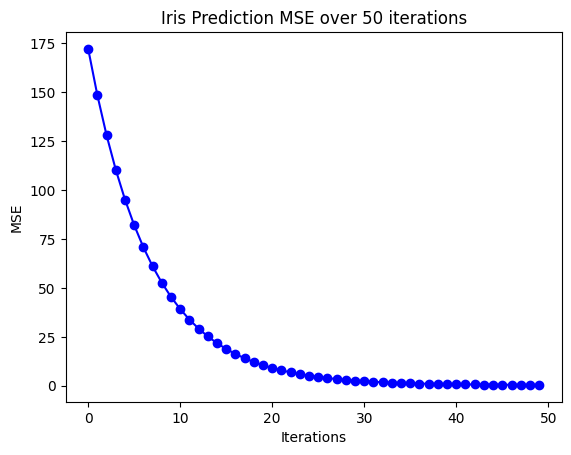

In [8]:
# Q4.1 (Ok, so I did this out of order but it makes more sense here)

import matplotlib.pyplot as plt
iterations = range(len(mse_iris))
# Plotting the results
plt.plot(iterations, mse_iris, 'o-', color='blue')
plt.title(f'Iris Prediction MSE over {iter_iris} iterations')
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [9]:
# Q3
import torch
import os
import pandas as pd
path = '../Data/'
filename = os.path.join(path, 'diabetes_train.csv')
df = pd.read_csv(filename)

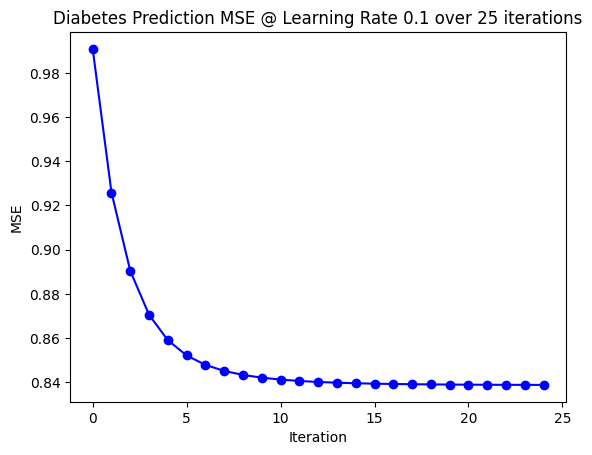

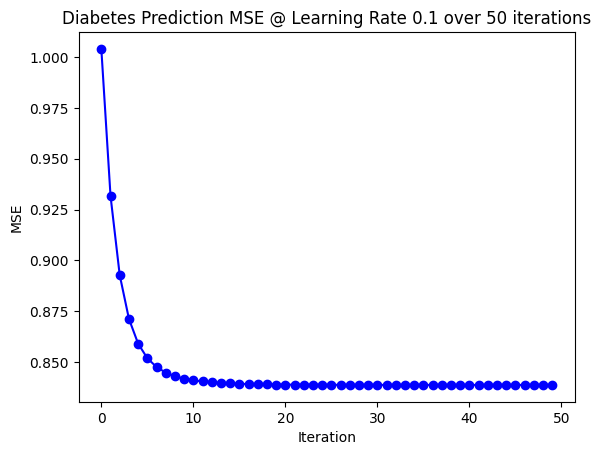

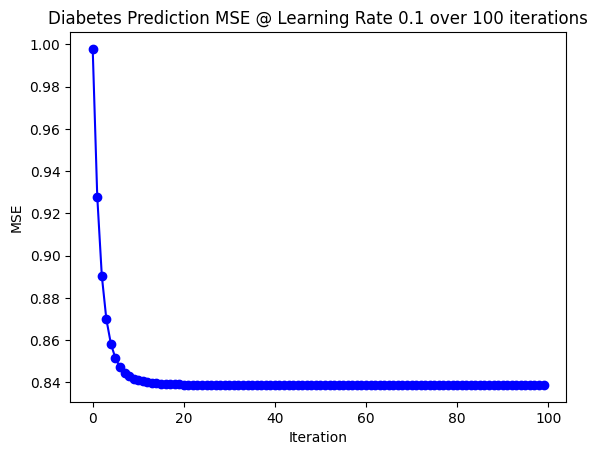

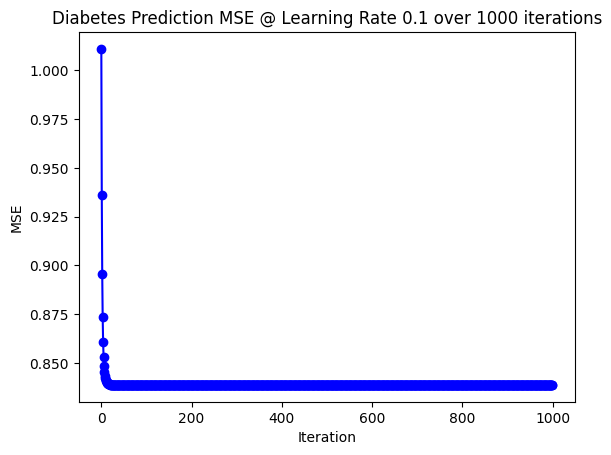

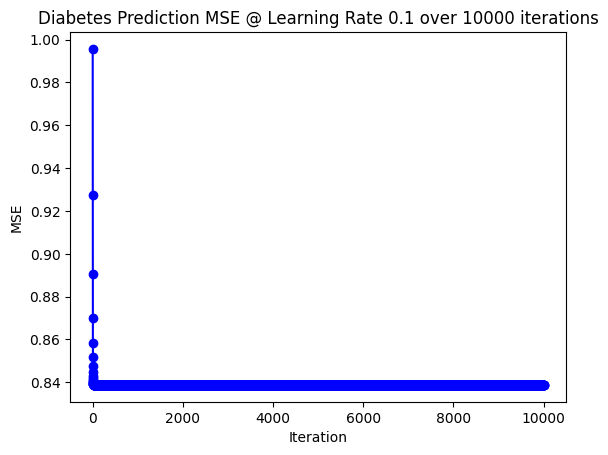

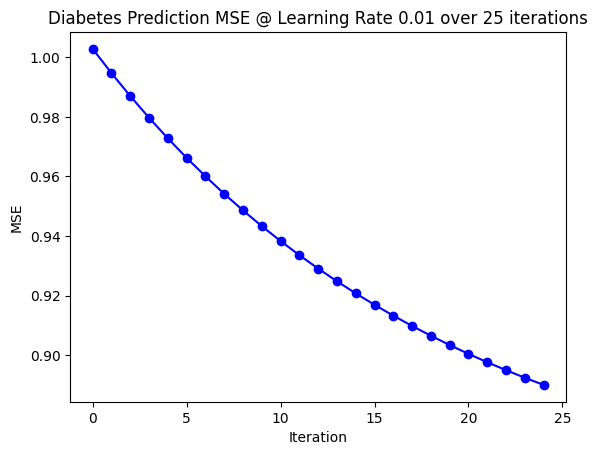

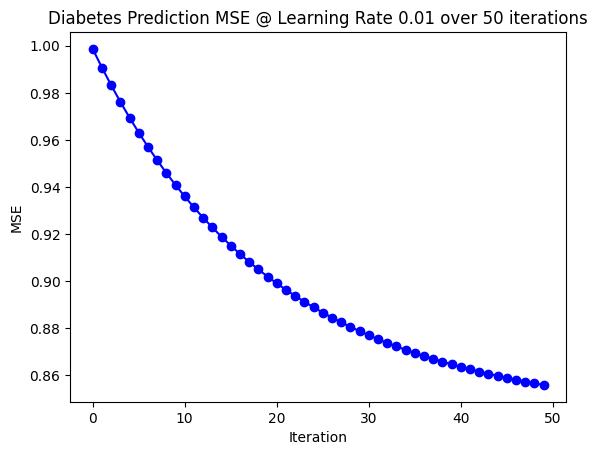

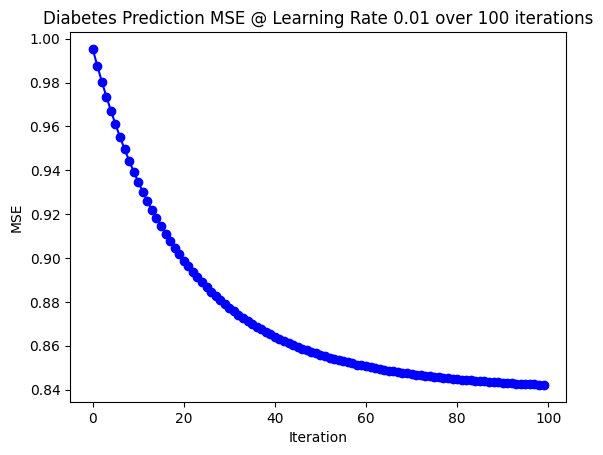

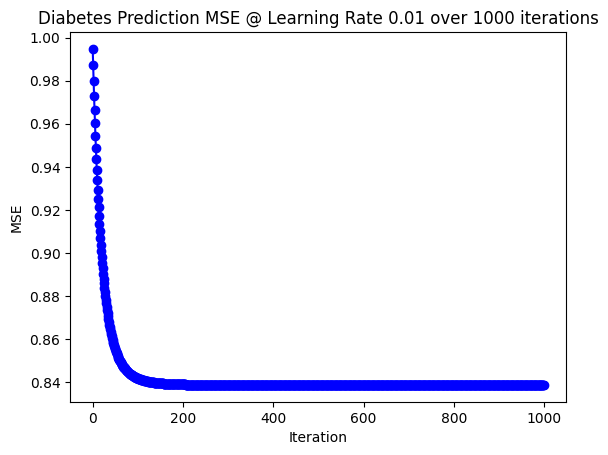

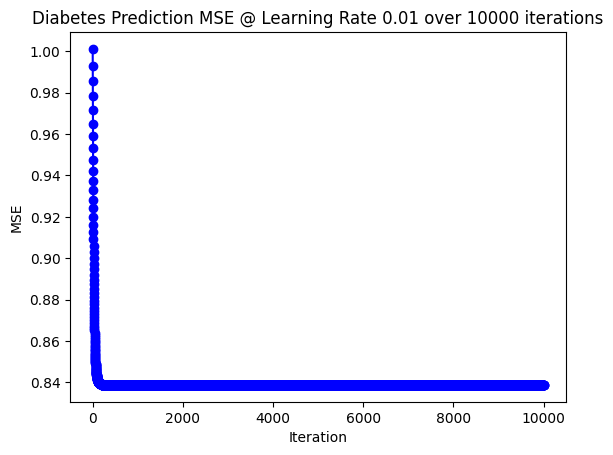

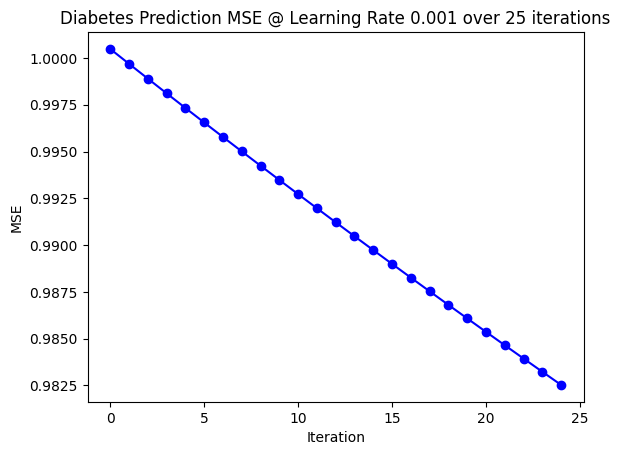

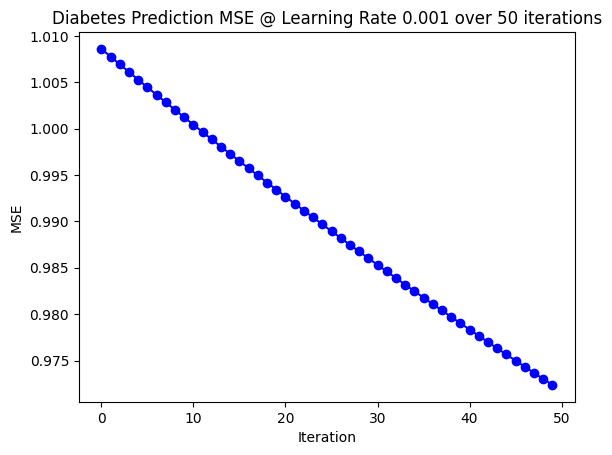

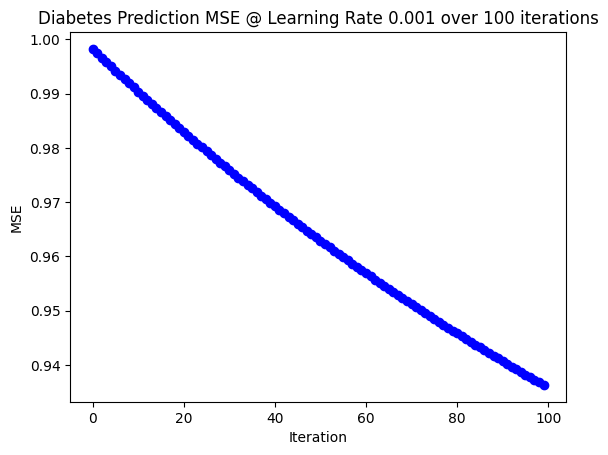

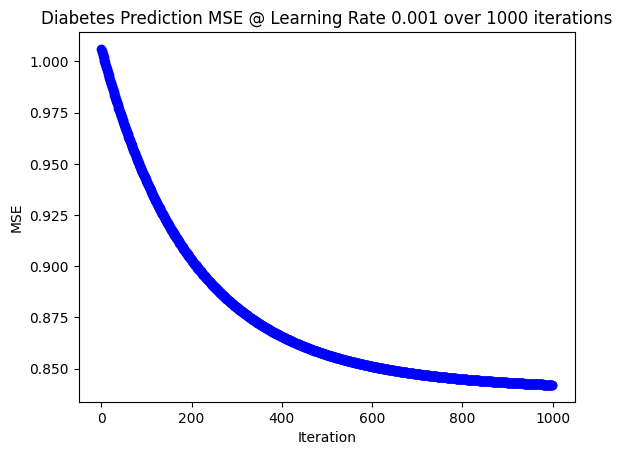

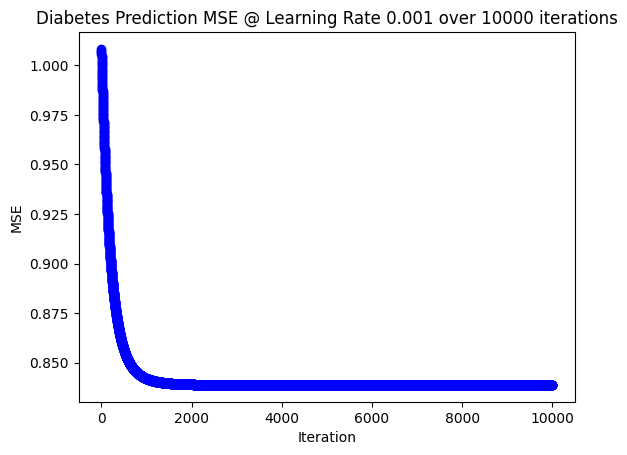

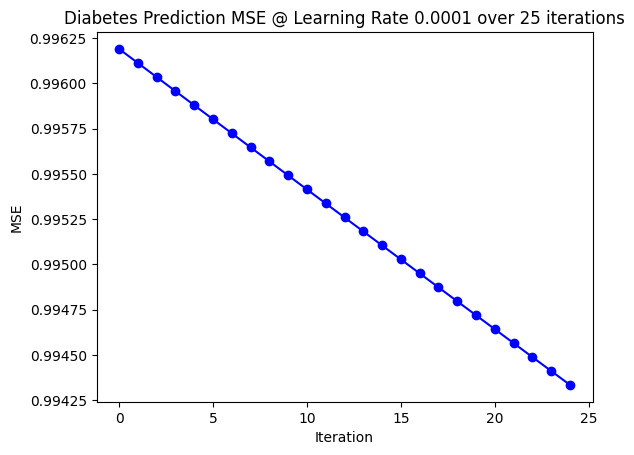

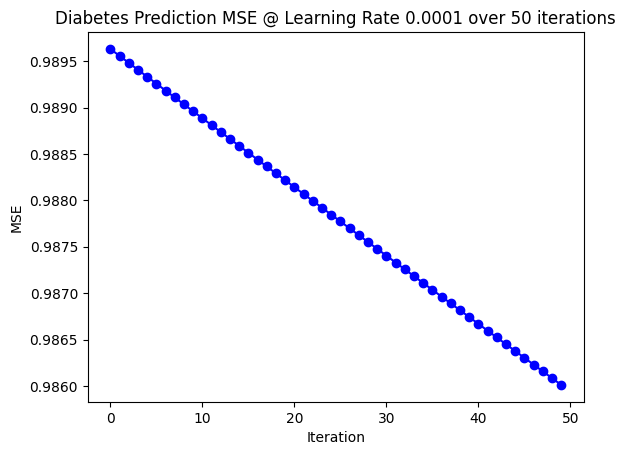

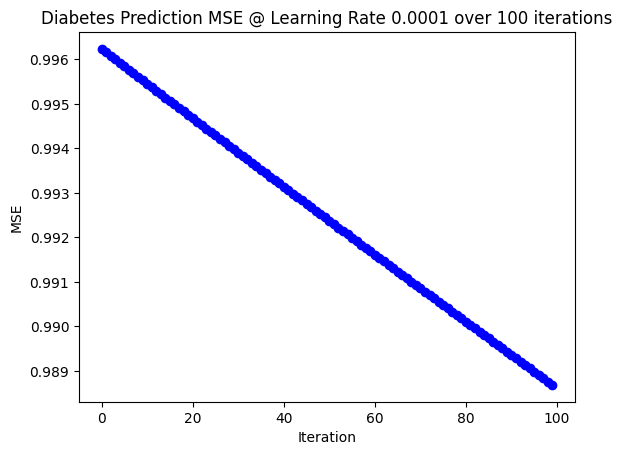

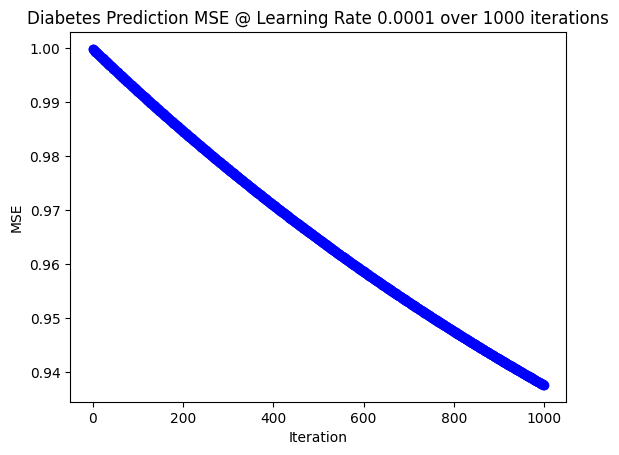

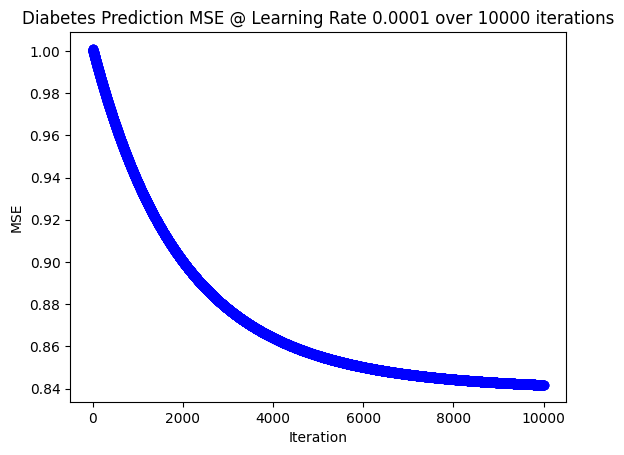

Final w: [[ 0.21673273  0.09705842  0.16967177  0.00802951]
 [-0.0156241   0.10908506  0.06801129  0.33757737]], b: [ 7.87611781e-05 -1.54653271e-03]
MSE: 0.8417589387635309


In [18]:
X_diab = df[["age", "pedi", "mass", "skin"]].values
y_diab = df[["plas", "insu"]].values

# This was a suggestion from ChatGPT after I asked why my errors were so high
X_diab = (X_diab - X_diab.mean(axis=0)) / X_diab.std(axis=0)
y_diab = (y_diab - y_diab.mean(axis=0)) / y_diab.std(axis=0)

n_diab = len(X_diab)
np.random.seed(42)

learning_rates_diab = [0.1, 0.01, 0.001, 0.0001]
iters_diab = [25, 50, 100, 1000, 10000]

for lr_diab in learning_rates_diab:

    for iter_diab in iters_diab:
        w_diab = np.random.randn(2, 4) * 0.01
        b_diab= np.random.randn(2) * 0.01
        mse_diab = []
        for _ in range(iter_diab):
            y_hat_diab = np.dot(X_diab, w_diab.T) + b_diab
            error_diab = y_hat_diab - y_diab
            # dW = (2/n) * (error^T X) 
            dw_diab = (2/n_diab) * (np.dot(error_diab.T, X_diab)) 
            # db = (2/n) * sum of errors over samples
            db_diab = (2/n_diab) * np.sum(error_diab, axis=0)
            w_diab -= lr_diab * dw_diab
            b_diab -= lr_diab * db_diab
            mse_diab.append(np.mean(error_diab ** 2))

        plt.figure()
        plt.plot(range(iter_diab), mse_diab, 'o-', color='blue')
        plt.title(f'Diabetes Prediction MSE @ Learning Rate {lr_diab} over {iter_diab} iterations')
        plt.xlabel("Iteration")
        plt.ylabel("MSE")
        plt.show()
print(f'Final w: {w_diab}, b: {b_diab}')
print(f'MSE: {mse_diab[-1]}')

From these perturbations of learning rate and training iterations, it appears that increasing the number of iterations simply pushes the graph toward a right angle. This is expected, as the iter=50 graph show the y^ and y fairly convergent after 20 or so iterations. Simply increasing the number of iterations is not going to significantly change the outcome.

A bigger effect can be seen in learning rate. This appears to flatten the learning curve significantly, allowing for a more fine-tuned approach to finding the learning saturation point (where y^ and y converge)